# Knowledge 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# Método pyplot

In [1]:
x = ["1T", "2T", "3T", "4T"]
y = [2000, 2200, 1100, 3540]

In [ ]:
plt.plot(x, y)

In [ ]:
#vai ter uma aula sobre cada característica dessa.

plt.plot(x, y, color="green", marker='o')

#quer uma super customização? Crie gráficos como objetos. 

# Integração Pandas + Pyplot

In [ ]:
cotacoes = yf.download("WEGE3.SA")['Adj Close']

cotacoes.plot()

In [ ]:
df = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

df = ((df.pct_change().dropna()) + 1).cumprod() - 1

df

In [ ]:
df.plot()

#obs: nunca faça gráficos com duas escalas. NUNCA! 

In [ ]:
df_mudando_coluna = df.copy()

df_mudando_coluna['dias'] = list(range(0, len(df)))

df_mudando_coluna.plot(x = "dias", y = "PETR4.SA")

# Outros tipos de gráficos: barra, histogramas, área, dispersão, pizza...

Para criar esses outros tipos de gráficos, basta utilizar o argumento "kind" e espeficicar o gráfico.

### Gráfico de barra com a performance acumulada das ações

In [ ]:
df.iloc[-1].plot(kind = "bar")

#brenno quero ver o eixo y em %: faça da maneira orientada a objeto. 
#Isso aqui é pra vc ver de forma rápida quando ta progrmando

### Gráfico de barra empilhado com a performance acumulada das ações ano a ano

Essa é uma ótima forma de vizualizar como os dados evoluíram ao longo do tempo. Qual % do total eles representavam antes e atualmente. É muito utilizado pra comércio internacional

In [ ]:
df_anual = df.resample("Y").last()

df_anual.index = [2000,20001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017, 2018, 2019, 2020, 2021, 2022, 2023]

df_anual.plot.bar(stacked = True)

In [ ]:
#horizontal

df_anual.plot.barh(stacked = True)

# Gráfico de área

Uma outra forma de visualizar isso são com gráficos de área.

In [ ]:
qtd_acoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Volume']
preco_original = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']

In [ ]:
volume = qtd_acoes * preco_original
volume

In [ ]:
volume = volume.dropna().resample("M").mean()

In [ ]:
volume.plot.area()

### Histograma de retornos diários

In [ ]:
cotacoes = yf.download("WEGE3.SA")['Adj Close']

retornos_diarios = cotacoes.pct_change().dropna()

retornos_diarios.plot.hist()

In [ ]:
retornos_diarios.plot.hist(bins=150)

# Boxsplot

Graças a Deus você não está na faculdade e não precisa fazer essa merda na mão.

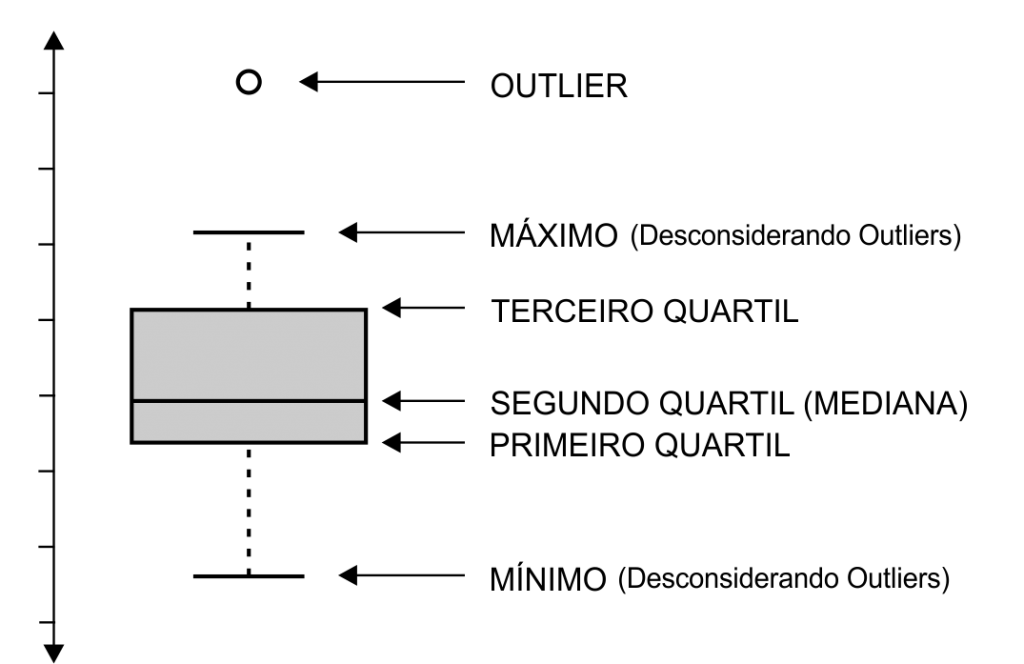

In [ ]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

retornos_mensais.plot.box()

# Gráfico de dispersão

Retornos Ibov x Dólar em cada ano

In [ ]:
cotacoes = yf.download(["^BVSP", "USDBRL=X"])['Close']

cotacoes = cotacoes.resample("Y").last().pct_change().dropna()

cotacoes['ano'] = cotacoes.index.year
cotacoes['ano'] = cotacoes['ano'].astype("category")

cotacoes.columns = ["Ibovespa", "Dólar", "Ano"]

cotacoes

In [ ]:
cotacoes.plot.scatter(x = "Dólar", y = "Ibovespa", c = "Ano",  cmap = "viridis")

# Exercícios

* Exercício 89: Mande o usuário digitar o código de 3 empresas da bolsa. Devolva pra ele:

        - Um gráfico de linha com a trajetória das cotações das empresas.
        - Um gráfico de área com o volume de cada ação.
        - Um gráfico boxsplot com os retornos mensais de cada ação.
        - Três gráficos de dispersão entre as ações e o ibovespa pra cada ano. 

In [ ]:
#gabarito 89

acao1 = str(input("Escolha a 1º ação: "))
acao2 = str(input("Escolha a 2º ação: "))
acao3 = str(input("Escolha a 3º ação: "))

lista_acoes = [acao1, acao2, acao3]

lista_acoes = [acao + ".SA" for acao in lista_acoes]

lista_acoes.append("^BVSP")

base_dados = yf.download(lista_acoes)

base_dados = base_dados.dropna()

lista_acoes.remove("^BVSP")

ibovespa = base_dados['Adj Close']['^BVSP']

retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()

cotacoes_empresas = base_dados['Adj Close'][lista_acoes]

cotacoes_empresas_original = base_dados['Close'][lista_acoes]

qtd_acoes = base_dados['Volume'][lista_acoes]

volume = cotacoes_empresas_original * qtd_acoes

volume = volume.resample("M").last()

retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()

retornos_anual = cotacoes_empresas.resample("Y").last().pct_change().dropna()

cotacoes_empresas.plot()

volume.plot.area()

retornos_mensais.plot.box()

for acao in lista_acoes:
    
    df = pd.DataFrame({acao: retornos_anual[acao],
                      'Ibovespa': retorno_anual_ibov}, index = retorno_anual_ibov.index)
    
    df['Ano'] = df.index.year
    df['Ano'] = df['Ano'].astype("category")
    
    df.plot.scatter(x = acao, y = "Ibovespa", c = "Ano",  cmap = "viridis")
                     
    
    